In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
def show(img):
    cv2.imshow('test',img);cv2.waitKey(0); cv2.destroyAllWindows()

In [3]:
path = 'debug_ade_images/'
img_files = [os.path.join(path, name) for name in sorted(os.listdir(path)) if name.endswith('.jpg')]
label_files = [img_file[:-4]+'_seg.png' for img_file in img_files]

In [4]:
img = cv2.imread(img_files[0])
label = cv2.imread(label_files[0])


In [5]:
red = img.copy();green=img.copy();blue=img.copy()
red[:,:,0] = 0; red[:,:,1] = 0
green[:,:,0] = 0; green[:,:,2] = 0
blue[:,:,1] = 0; blue[:,:,2] = 0

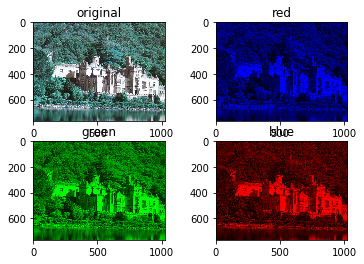

In [6]:
fig, axes = plt.subplots(2,2)
axes[0,0].imshow(img);axes[0,0].set_title('original')
axes[0,1].imshow(red);axes[0,1].set_title('red')
axes[1,0].imshow(green);axes[1,0].set_title('green')
axes[1,1].imshow(blue);axes[1,1].set_title('blue')
plt.show()

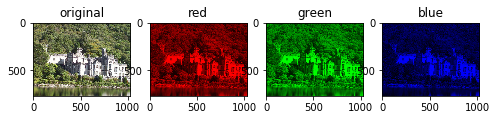

In [8]:
from collections import defaultdict
imgs = [img,red,green,blue]
test = defaultdict(list)
for color,img in zip(['original','red','green','blue'],imgs):
    test[color] = img
    
_,axes = plt.subplots(1,4,figsize=(8,8))
axes = axes.flatten()
for (color,img), ax in zip(test.items(), axes):
    ax.imshow(img[...,::-1])
    ax.set_title(color)
plt.show()

In [54]:
red.shape


(768, 1024, 3)

In [55]:
import torch
red_pt = torch.from_numpy(red)
red_pt.unsqueeze(0).shape

torch.Size([1, 768, 1024, 3])

In [56]:
np.expand_dims(red,0).shape

(1, 768, 1024, 3)

In [57]:
a = torch.tensor(
        [[ 1.3398,  0.2663, -0.2686,  0.2450],
        [-0.7401, -0.8805, -0.3402, -1.1936],
        [ 0.4907, -1.3948, -1.0691, -0.3132],
        [-1.6092,  0.5419, -0.2993,  0.3195]])


In [58]:
torch.argmax(a.unsqueeze(-1), dim=-1)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])

In [ ]:
@staticmethod
def plot(imgs,names =None):
    import matplotlib.pyplot as plt
    if isinstance(imgs, list):
        _, axes = plt.subplots(1, len(imgs), figsize = (25,25))
        axes = axes.flatten()
        for img, ax,name in zip(imgs,axes,names):
            if img.ndim ==2:
                ax.imshow(img,cmap='gray')
            else:
                ax.imshow(img[:,:,::-1])
            ax.set_title(name)
        plt.show()
    elif imgs.ndim==2:
        plt.imshow(imgs, cmap='gray'); plt.show()
    else:
        plt.imshow(imgs); plt.show()